# Proyecto Titanic

Vamos a realizar el proyecto sobrevivir al titanic. El proyecto consiste en predecir que pasajeros vana a sobrevivir o no.
Para este proyecto vamos a usar Arboles de decision.

1. Sobreviviente: 0 = No, 1 = Si
2. Clase: 1 = Primera clase: 2 = segunda clase: 3 = tercera clase
3. Genero: 0 = Hombre: 1 = Mujer
4. Edad: Edad en años
5. HermEsp: Cantidad de hermanos o esposos a bordo del titanic, para el pasajero en cuestion
6. PadHij: Cantidad de padres o hijos abordo.

In [3]:
# Iniciamos importando las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerias de machine learning

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

In [4]:
# leeamos el arvhivo csv

data = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Udemy/Titanic_ml/DataSet_Titanic.csv")

In [5]:
# Visualizamos las primeras 5 lineas
data.head(5)

,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [7]:
# Vamos a ir directamente a la parte de machine learning.
# Guardamos en la variable x los atributos predictores (todas las columnas o etiquetas menos Sobreviviente
X = data.drop("Sobreviviente", axis=1)
# Lo nombramos X mayuscula ya que eso indica que es la X que contiene todas las x.
# usamos el metodo drop que lo que hace es eliminar una columna. Lo que hacemos es guardar todo el dataframe menos la columna Sobrevivientes y axis= le indicamos con 1 que es una columna y con 0 que seria una fila.
y = data["Sobreviviente"]

In [8]:
# Ahora vamos a visualizar el eje X

X.head()

,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [9]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sobreviviente, dtype: int64

In [19]:
# Vamos a crear nuestro arbol
arbol = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
# entrenamos a la maquina
arbol.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
# Nuestro modelo ya esta entrenado. Esto significa que contamos con una herramienta que dadas ciertas caracteristicas devuelve que etiqueta y modelo cree que le corresponde. Esto lo podemos hacer utilizando predicciones de todas las clases correspondientes a modelos de Scikit-Learn

In [22]:
# Predecimos sobre nuestro set
pred_y = arbol.predict(X)

# Comparamos con las etiquetas reales
print("Precision: ", accuracy_score(pred_y, y))

Precision:  0.8151260504201681


In [23]:
# creamos una matriz de confusion
confusion_matrix(y, pred_y)

array([[372,  52],
       [ 80, 210]])

/Users/adrianinfantesromero/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


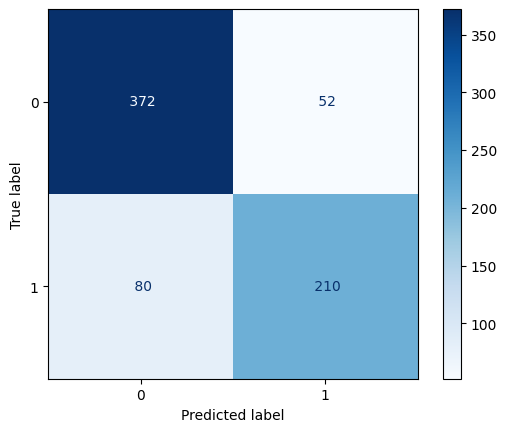

In [24]:
# y creamos el grafico de esta matriz de confusion para entender mejor los datos que nos arroja.
plot_confusion_matrix(arbol, X, y, cmap=plt.cm.Blues, values_format=" .0f")

/Users/adrianinfantesromero/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


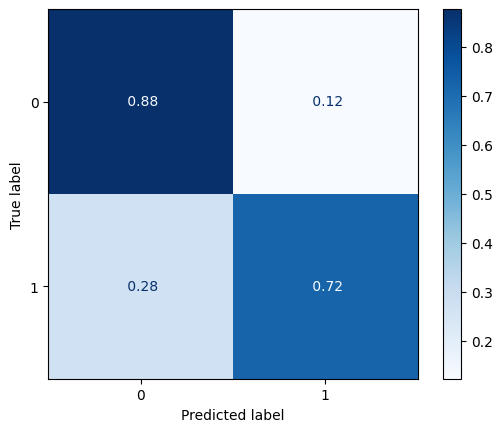

In [25]:
# esto quiere decir en el eje vertical las verdaderas y en el horizontal las predicciones. Vemos que de los datos que murieron 407 realmente nosotros hemos podido hacerlo coincidir en 166.
# vamos a ver otra manera de visualizarlo.
plot_confusion_matrix(arbol, X, y, cmap=plt.cm.Blues, values_format=" .2f", normalize="true")

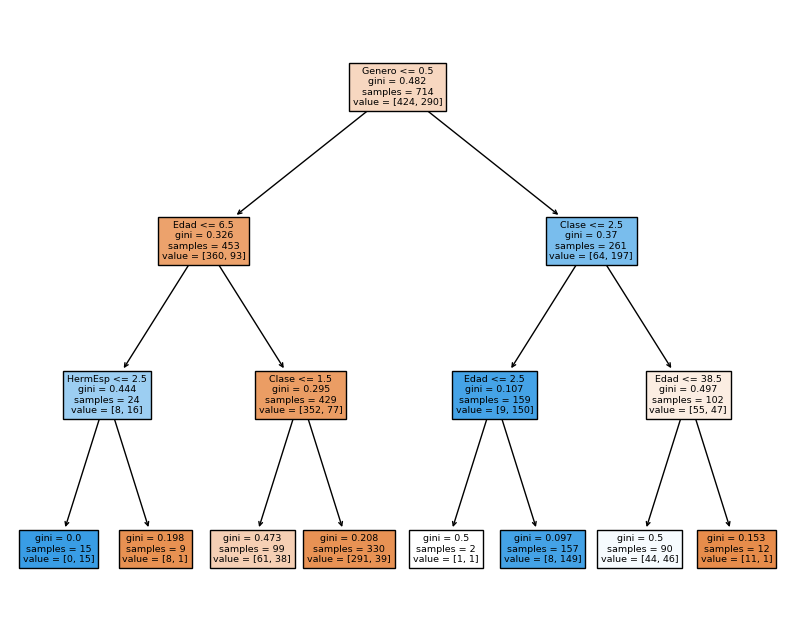

In [26]:
# Mostramos el arbol graficamente
plt.figure(figsize= (10,8))
tree.plot_tree(arbol, filled=True, feature_names=X.columns)
plt.show()

/Users/adrianinfantesromero/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


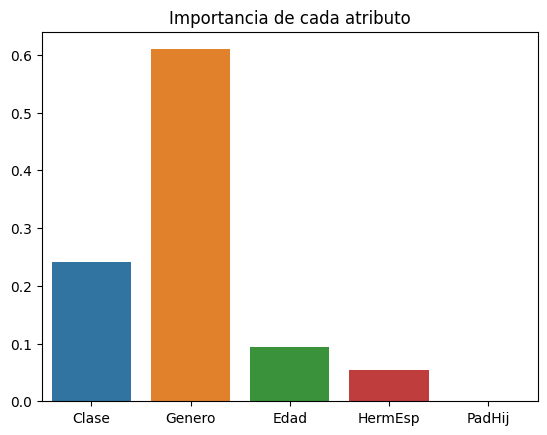

In [27]:
# Graficamos las importancias en un grafico de barras
# creamos las variables x (importancias) e y(columnas)
importancias = arbol.feature_importances_
columnas = X.columns

# ahora creamos el grafico

sns.barplot(columnas, importancias)
plt.title("Importancia de cada atributo")
plt.show()